In [ ]:
import cv2 as cv
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt

In [ ]:
# Cloning YOLO Version 5

!git clone https://github.com/ultralytics/yolov5
%cd yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 16960, done.
remote: Counting objects: 100% (155/155), done.
remote: Compressing objects: 100% (106/106), done.
remote: Total 16960 (delta 78), reused 99 (delta 49), pack-reused 16805 (from 1)
Receiving objects: 100% (16960/16960), 15.70 MiB | 19.75 MiB/s, done.
Resolving deltas: 100% (11607/11607), done.
/content/yolov5


In [ ]:
# Extracting Validation Set zipfile to colab

import zipfile
import os

zip_file_path = '/content/Validation Set.zip'
extract_dir = '/content/Validation Set'

# creating a directory if it not exists
os.makedirs(extract_dir,exist_ok = True)


# Extracting the Zip file
with zipfile.ZipFile(zip_file_path,  'r') as zip_ref:
  zip_ref.extractall(extract_dir)

print(f'DataSet extracted to: {extract_dir}')

DataSet extracted to: /content/Validation Set


In [ ]:
# Training the Model (It takes long time, you can use trained results given in repo)

#!python /content/yolov5/train.py --img-size 640 --batch-size 16 --epochs 50 --data /content/dataset/trafic_data/data_1.yaml --weights yolov5s.pt  --device 0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Saving the results in drive for future use

# import shutil
# shutil.copytree('/content/yolov5/runs/train/','/content/drive/MyDrive/yolov5_train_results/', dirs_exist_ok=True)
# shutil.copy('/content/yolov5/runs/train/exp/weights/best.pt','/content/drive/MyDrive/yolov5_best_weights.pt')

Mounted at /content/drive


In [ ]:
# Path to the results.csv file (results after training)
results_csv = '/content/drive/MyDrive/yolov5_train_results/exp/results.csv'

# Load and print results
df = pd.read_csv(results_csv)
df.head()


,epoch,train/box_loss,train/obj_loss,train/cls_loss,metrics/precision,metrics/recall,metrics/mAP_0.5,metrics/mAP_0.5:0.95,val/box_loss,val/obj_loss,val/cls_loss,x/lr0,x/lr1,x/lr2
0,0,0.090227,0.067093,0.070377,0.50781,0.11416,0.066005,0.027367,0.066224,0.068900,0.055804,0.070178,0.003314,0.003314
1,1,0.069776,0.060242,0.054165,0.61013,0.14537,0.096784,0.041843,0.061354,0.067204,0.044673,0.040046,0.006515,0.006515
2,2,0.065885,0.058541,0.046266,0.82364,0.11955,0.126440,0.047191,0.062347,0.067296,0.038981,0.009782,0.009585,0.009585
3,3,0.059102,0.057536,0.041229,0.71044,0.18976,0.194100,0.086599,0.053576,0.066862,0.033944,0.009406,0.009406,0.009406
4,4,0.055126,0.059131,0.037389,0.86447,0.19170,0.221330,0.107580,0.050792,0.066932,0.031375,0.009406,0.009406,0.009406


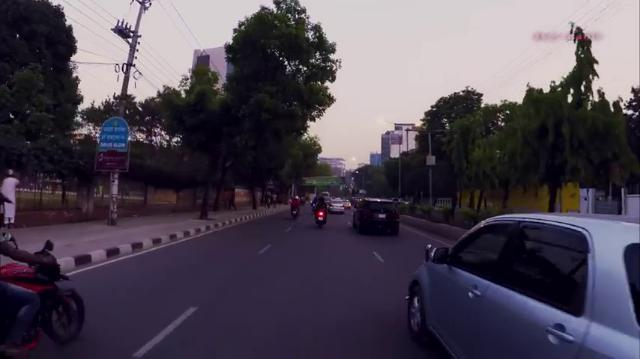

In [ ]:
# Importing Python Imaging Library(PIL) to display images

from PIL import Image
from IPython.display import display

image_path = '/content/Validation Set/valid/images/Pias--145-_jpg.rf.de11b9ac677fe807ab17826d45c4234c.jpg'
image = cv.imread(image_path)

image_1 = Image.open(image_path)
display(image_1)

In [ ]:
# Using Model

best_weigths_path = '/content/drive/MyDrive/yolov5_train_results/exp/weights/best.pt'
model = torch.hub.load('ultralytics/yolov5','custom', path = best_weigths_path)

/usr/local/lib/python3.10/dist-packages/torch/hub.py:295: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
requirements: Ultralytics requirement ['gitpython>=3.1.30'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 269.4 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 2.5s, installed 1 package: ['gitpython>=3.1.30']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect



YOLOv5 🚀 2024-9-23 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7066762 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [ ]:
from PIL import Image
from IPython.display import display

def detected_image (image_path):

  # load the image using OpenCv
  image = cv.imread(image_path)
  open_image = Image.open(image_path)
  display(open_image)

  # Converting image in rgb format for model
  rgb_image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

  # Performing Inference
  results = model(rgb_image)
  results_df = results.pandas().xyxy[0]

  for index, row in results_df.iterrows():
    x1,y1,x2,y2,confidence,class_id = int(row['xmin']), int(row['ymin']),int(row['xmax']),int(row['ymax']),row['confidence'],int(row['class'])
    label = f"{results.names[class_id]}: {confidence:.2f}"

    # Drawing rectangle
    cv.rectangle(image,(x1,y1),(x2,y2),(0,255,0),2)
    cv.putText(image,'Dectected Vehicles',(10,20),cv.FONT_HERSHEY_SIMPLEX,1,(255,0,0),2)
    cv.putText(image,label,(x1,y1-10),cv.FONT_HERSHEY_SIMPLEX,0.5,(0,255,0),2)

  # Converting image in rgb format for displaying
  image_rgb = cv.cvtColor(image,cv.COLOR_BGR2RGB)

  # Displaying Image
  image_pil = Image.fromarray(image_rgb) #converting in PIL format
  display(image_pil)



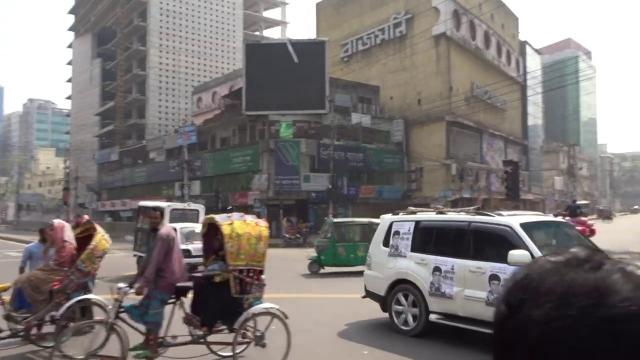

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


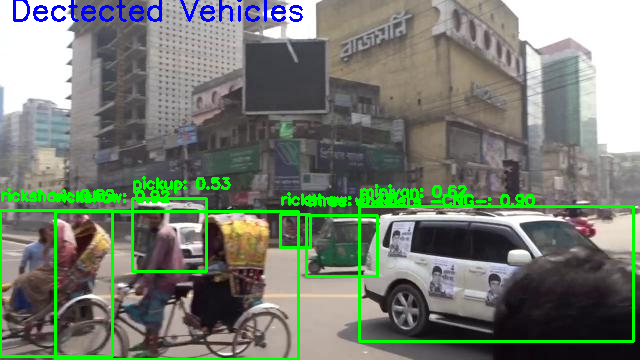

In [36]:
detected_image('/content/Validation Set/valid/images/Pias--221-_jpg.rf.a301dc2e8831f0487764df69f75ddc15.jpg')